In [158]:
import pandas as pd
import numpy as np
from helpers import select_entries, clean_categories, re_arrange_for_boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import pygal 
import math
from pygal.style import Style

In [111]:
data_folder = "./data/"

In [112]:
france = pd.read_csv(data_folder + 'france_data.csv')
usa = pd.read_csv(data_folder + 'us_data.csv')

# Category: meat, poultry, fish and seafood

Here we find all the data which contain anything that can be considerer meat, poultry, fish and seafood:

In [190]:
allowed_words = ["meat", "poultry", "fish", "seafood", "chicken", "pork", "cow", "veal", "veau", "shrimp",
               "beef", "steak", "turkey", "duck", "foie gras", "agneau", "porc", "cheval", "viande",
                "rib", "loin", "boeuf", "bœuf", "vache", "poule", "poisson", "crayfish", "lobster", "saumon",
                "salmon", "thon", "tuna", "sardine", "charcuterie"]

In [191]:
not_allowed_words = ["cheese", "sauce", "sandwich", "pizza", "fromage", "frites", "ravioli", "dairi", "dairy", 
                     "soup", "yaourt", "nugget", "gravy", "cracker", "pie", "broth", "bouillon", "quiche",
                     "chicken dinner", "salad", "base", "dumpling", "chowder", "panini", "bread", "popcorn",
                     "seasoning mix", "creole", "beefless", "tagliatelle", "terrine", "taboule", "risotto",
                     "rice", "riz", "creme", "crème", "boulghour", "mousse", "fisherman", "beverage", "ice cream",
                     "aceituna", "haribo"]
not_allowed_ingredients = ["pasta", "légume", "vegetable"]

In [192]:
meats_france = select_entries(france, allowed_words)
meats_usa = select_entries(usa, allowed_words)

meats_france_before = meats_france.shape[0]
meats_usa_before = meats_usa.shape[0]


meats_france = clean_categories(meats_france, not_allowed_words, not_allowed_ingredients)
meats_usa = clean_categories(meats_usa, not_allowed_words, not_allowed_ingredients)

print("Meat, poultry, fish and seafood items in France before cleaning: {}".format(meats_france_before))
print("Meat, poultry, fish and seafood items in France after cleaning: {}".format(meats_france.shape[0]))
print("")
print("Meat, poultry, fish and seafood items in USA before cleaning: {}".format(meats_usa_before))
print("Meat, poultry, fish and seafood items in USA after cleaning: {}".format(meats_usa.shape[0]))

Meat, poultry, fish and seafood items in France before cleaning: 18499
Meat, poultry, fish and seafood items in France after cleaning: 12634

Meat, poultry, fish and seafood items in USA before cleaning: 14011
Meat, poultry, fish and seafood items in USA after cleaning: 8558


### Plotting distribution of nutrients

In [35]:
france_interesting_cols = meats_france[['proteins_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g', 'sugars_100g']].astype(float).replace({0.0:np.nan})
usa_interesting_cols = meats_usa[['proteins_100g', 'fat_100g', 'fiber_100g', 'carbohydrates_100g', 'sugars_100g']].astype(float).replace({0.0:np.nan})

In [36]:
data_boxplot = re_arrange_for_boxplot(france_interesting_cols,"France").append(
    re_arrange_for_boxplot(usa_interesting_cols,"US"))

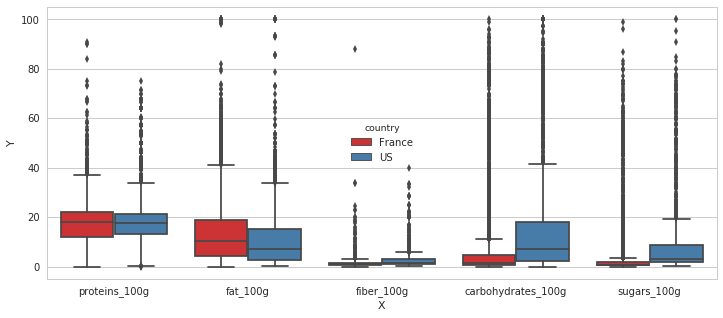

In [37]:
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.boxplot(x="X",y ="Y", hue="country", data=data_boxplot, palette="Set1")

Here we see that when it comes to protein levels the food items in the US and in France are fairly equal. As for the fats it seems to be the case that france has more fat in the food than the US. Looking at the meat items in the France data with fat between 50g and 80g per 100g we see that there is almost exclusively variants of foie gras there, which might explain the big difference, as this dish is not as popular in the US as it is in France.

The big difference however can be seen in the amount of carbohydrates in the US food.
What could be the reason for this? To find out, we start by looking at the food items from the US with more than 15 and less than 30 grams carbohydrates per 100g.

In [38]:
us_asd = meats_usa[meats_usa['carbohydrates_100g'] > 15]
print(us_asd.shape)
us_qwe = us_asd[us_asd['carbohydrates_100g'] < 30]
print(us_qwe.shape)
us_qwe

(1737, 51)
(1101, 51)


,Unnamed: 0,product_name,brands,brands_tags,ingredients_text,serving_size,categories,categories_tags,categories_en,serving_quantity,...,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
384,384,"International Inc., Frozen Shrimp Tempura","Jfc, Jfc International Inc.","jfc,jfc-international-inc",Seasoned flour (wheat flour wheat starch bakin...,85 g (3 oz),NaN,NaN,NaN,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,1132,Cooked Dried Pork Product,Ching Yeh Pork Fu,ching-yeh-pork-fu,"Pork, sugar, soy flour, soy sauce (water, soyb...",28 g (1 oz),NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1133,1133,"Golden Island, Kettle-Cooked Beef Jerky, Chili...",Formosa Food Co Inc,formosa-food-co-inc,"Beef, water, sugar, gluten free soy sauce (wat...",28 g (1 ONZ),NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,1135,"Golden Island, Pork Jerky, Sriracha",Golden Island Jerky Inc.,golden-island-jerky-inc,"Porx, water, browin sugar, sugar gluten free s...",28 g (1 oz),NaN,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,1458,Seafood Sticks,Kanimi,kanimi,"Fish protein (pollock and/or pacific whiting),...",85 g (0.5 cup),NaN,NaN,NaN,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,1459,Seafood Sticks,Seafarer,seafarer,"Fish protein (pollock and/or pacific whiting),...",85 g (0.5 cup),NaN,NaN,NaN,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911,1911,Roast Beef & Cheddar Half Sub,Fresh Foods Market,fresh-foods-market,"Roast beef (beef, water, contains less than 2%...",255 g (1 SUB),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,1919,Honey Ham & Turkey Sliders,Fresh Foods Market,fresh-foods-market,Roll (enriched wheat and malted barley flour [...,159 g (2 SLIDERS),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,1920,Pesto Chicken & Mozzarella On Ciabatta,Fresh Foods Market,fresh-foods-market,"White chicken meat (with water, salt, spices, ...",261 g (1 SANDWICH),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2759,2759,Porks & Beans,NaN,NaN,"Prepared white beans, water, sugar, contains l...",129 g (0.5 cup),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
france_asd = meats_france[meats_france['carbohydrates_100g'] > 5]
print(france_asd.shape)
france_qwe = france_asd[france_asd['carbohydrates_100g'] < 11]
print(france_qwe.shape)
france_qwe

(2243, 51)
(706, 51)


,Unnamed: 0,product_name,brands,brands_tags,ingredients_text,serving_size,categories,categories_tags,categories_en,serving_quantity,...,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
56,56,"Légumes du pot au feu, bœuf avec morceaux",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,81,La Vache De Paris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,169,Émincés de poulet,Raynal et Roquelaure,raynal-et-roquelaure,"eau, viande de poulet traitée en salaison et r...",NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,204,Terrinne aux 3 poissons,Amand,amand,ln rédients : POISSON (40% : SAUMON Salmo sala...,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,347,Boulettes au boeuf à la napolitaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,503,Gratin de poisson pauvre en sel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,765,Thon à la Catalane (6 boîtes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,787,Rillettes de porc,Comtesse Du Barry,comtesse-du-barry,poireau céÀ de jambon de Bayne nitrate de pota...,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,1039,Petite quenelles de veau,Raynal et Roquelaure,raynal-et-roquelaure,"Quenelles : farine blé, gras de veau, blanc d'...",NaN,"en:meals, fr:quenelles, en:veal-quenelles","en:meals,fr:quenelles,en:veal-quenelles","Meals,fr:Quenelles,Veal quenelles",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0
1043,1043,Brochette de poulet,Sing’ly,sing-ly,"Poulet (origine: UE et/ou Brésil) 65%, eau, mi...",NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So the hypothesis is that the US adds more things containing calories than what france does. An example could be that they have larger amounts of sauces, things are more fried in oil in general or that the meat comes wrapped in some kind of bread etc. As the fat content is not a big difference between the two countries we cannot just say that in the US, people fry everything.

In [159]:
custom_style_france_first = Style(
    background='transparent',
    plot_background='#FFFFFF',
    font_family='googlefont:Muli',
    title_font_size=14,
    opacity='.7',
    opacity_hover='.95',
    transition='400ms ease-in',
    colors=('#002395', '#B22234')
)

In [186]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Sugars per 100g'

box_chart.add('France', np.log(meats_france['sugars_100g'] + 1).dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('US', np.log(meats_usa['sugars_100g'] + 1).dropna())
box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('meats_sugars.svg')


In [209]:
box_chart = pygal.Box(box_mode="tukey", style=custom_style_france_first)
box_chart.title = 'Carbohydrates per 100g'

box_chart.add('France', np.log(meats_france['carbohydrates_100g'] + 1).dropna())
# Transform into log(x + 1) to be able to plot logarithmic scale with the zero values
box_chart.add('US', np.log(meats_usa['carbohydrates_100g'] + 1).dropna())
box_chart.y_labels = np.log((np.array([0, 1, 5, 10, 50, 100]) + 1)).tolist()
# Transform the y-axis to exp(y) - 1 to match the x-axis
box_chart.value_formatter = lambda y: "{:10.2f}".format(math.exp(float(y)) - 1)
box_chart.render_to_file('meats_carbs.svg')

In [207]:
high_fat = meats_france[meats_france['fat_100g'] > 50]
high_fat = high_fat[high_fat['fat_100g'] < 90]['product_name']
high_fat.sample(10)

75023                                             Foie gras
140727                               Le foie gras artisanal
71003               Foie gras de canard entier à l'ancienne
55998               Foie gras de canard entier du sud ouest
77670                FOIE GRAS DE CANARD ENTIER DU PERIGORD
80816                                     Foie gras torchon
138005      Bloc de Foie Gras de Canard avec morceaux (30%)
104146             Bloc de foie gras de canard du sud ouest
140737    La tradition le foie gras de canard entier du ...
71776                          Tarama aux Œufs de Cabillaud
Name: product_name, dtype: object

In [199]:
meats_france.loc[4766]

Unnamed: 0                                                               4766
product_name                                   Foie de Morue Nature au Citron
brands                                                             Connétable
brands_tags                                                        connetable
ingredients_text            _Foie de morue_ et son huile naturellement lib...
serving_size                                                              NaN
categories                  Produits de la mer,Poissons,Morues,Foies de morue
categories_tags                    en:seafood,en:fishes,en:cods,en:cod-livers
categories_en                                  Seafood,Fishes,Cods,Cod livers
serving_quantity                                                            0
energy_100g                                                              2515
proteins_100g                                                               5
carbohydrates_100g                                              